<a href="https://www.kaggle.com/sadiqueabdullah/the-happy-tails?scriptVersionId=86781053" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happy-whale-and-dolphin/sample_submission.csv
/kaggle/input/happy-whale-and-dolphin/train.csv
/kaggle/input/happy-whale-and-dolphin/train_images/80b5373b87942b.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/e113b51585c677.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/94eb976e25416c.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/19a45862ab99cd.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/be9645065510e9.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/76d25044120d3c.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/0c64a705ba5d31.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/c1fe278bdbd837.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/6f94f30ac500a0.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/15f295322e5b54.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/f3a102d194cf90.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/620f2cf64896e9.jpg
/kaggle/input/happy-whale-and-dolphin/train_images/5

# **OVERVIEW**

The data provided is a pool of images of sea creatures, claimed to be of Whales and Dolhins. The data in this competition contains images of over 15,000 unique individual marine mammals from 30 different species collected from 28 different research organizations. Individuals have been manually identified and given an individual_id by marine researches.

The task is to correctly identify these individuals in the images. It's a challenging task that has the potential to drive significant advancements in understanding and protecting marine mammals across the globe.

This is an image classification problem .I will be using Convolutional Neural Networks (CNNs) technique for the solution. 

# **PROCESS STEPS**

The rough archtecture of the process flow steps is covered through following 6 steps. I will keem modifying the steps based on the need as I move ahead.

**Step 0:** Import Datasets

**Step 1:** Detect Dolphin and Whales

**Step 2:** Create a CNN to Classify Dolphin & Whales Species

**Step 3:** Use a CNN to Classify Dolphin & Whales Species

**Step 4:** Algorithm writing

**Step 5:** Algorithm testing


# **Step 0:** Import Datasets

In [2]:
path = '/kaggle/input/happy-whale-and-dolphin/'
os.listdir(path)

['sample_submission.csv', 'train_images', 'train.csv', 'test_images']

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test datasets
def load_dataset(path):
    data = load_files(path)
    whales_files = np.array(data['filenames']) 
    whales_targets = np_utils.to_categorical(np.array(data['target']), 30)
    return whales_files, whales_targets

# load the datasets
train_files, train_targets = load_dataset('../input/happy-whale-and-dolphin/train_images')
test_files, test_targets = load_dataset('../input/happy-whale-and-dolphin/test_images')

sample_submission = pd.read_csv("../input/happy-whale-and-dolphin/sample_submission.csv")
train = pd.read_csv("../input/happy-whale-and-dolphin/train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51033 entries, 0 to 51032
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          51033 non-null  object
 1   species        51033 non-null  object
 2   individual_id  51033 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [5]:
train.head()

image             species individual_id
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9
1  000562241d384d.jpg      humpback_whale  1a71fbb72250
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


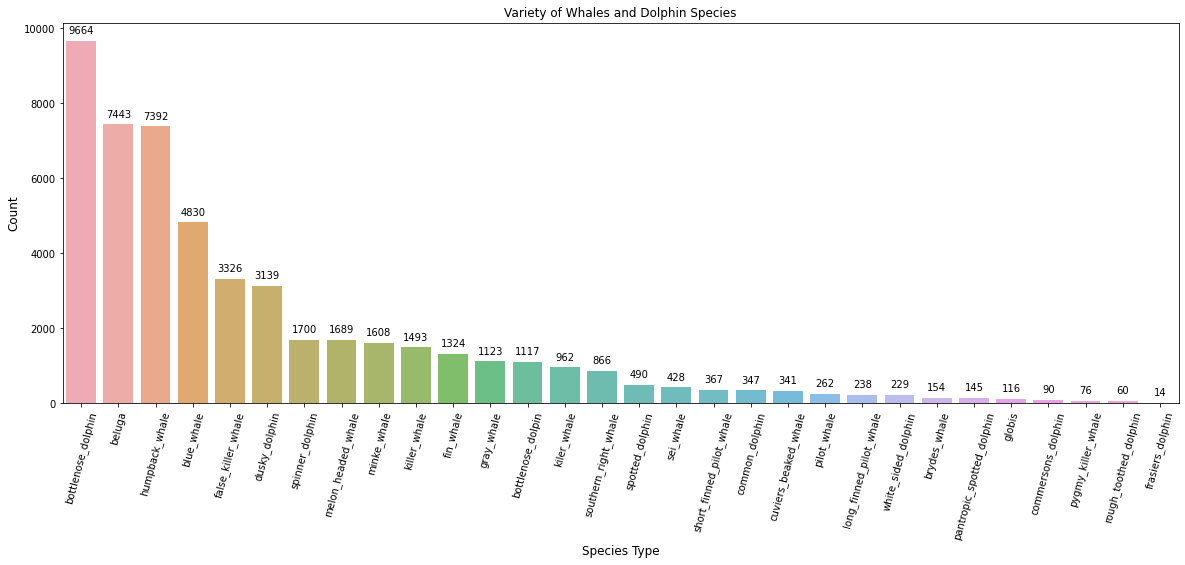

In [6]:
# Checking for species categories distribution
import matplotlib.pyplot as plt
import seaborn as sns

species_count  = train['species'].value_counts()

plt.figure(figsize=(20,7))
g=sns.barplot(species_count.index, species_count.values, alpha=0.8)
plt.title('Variety of Whales and Dolphin Species')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Species Type', fontsize=12)
plt.xticks(rotation=75)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()


In [7]:
# Checking the number of unique species in train data set
species = train.species.unique()
species

array(['melon_headed_whale', 'humpback_whale', 'false_killer_whale',
       'bottlenose_dolphin', 'beluga', 'minke_whale', 'fin_whale',
       'blue_whale', 'gray_whale', 'southern_right_whale',
       'common_dolphin', 'kiler_whale', 'pilot_whale', 'dusky_dolphin',
       'killer_whale', 'long_finned_pilot_whale', 'sei_whale',
       'spinner_dolphin', 'bottlenose_dolpin', 'cuviers_beaked_whale',
       'spotted_dolphin', 'globis', 'brydes_whale', 'commersons_dolphin',
       'white_sided_dolphin', 'short_finned_pilot_whale',
       'rough_toothed_dolphin', 'pantropic_spotted_dolphin',
       'pygmy_killer_whale', 'frasiers_dolphin'], dtype=object)

<AxesSubplot:>

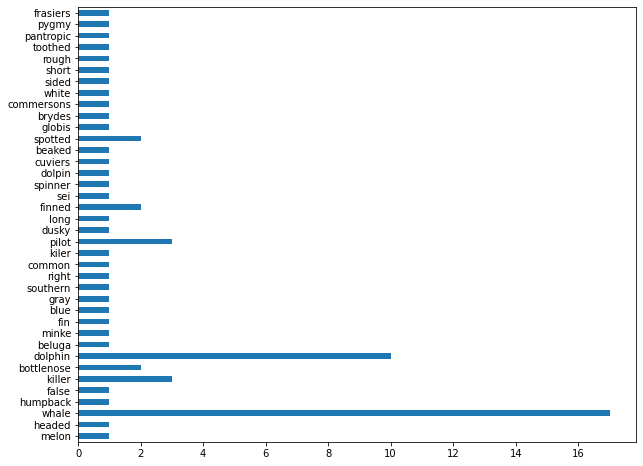

In [8]:
df=pd.DataFrame(species,columns=['text'])

x = df.text.apply(lambda x: pd.value_counts(x.split("_"))).sum(axis = 0)
x.plot(kind= 'barh', figsize = (10, 8))